https://matplotlib.org/3.1.1/tutorials/index.html

# Usage Guide

https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

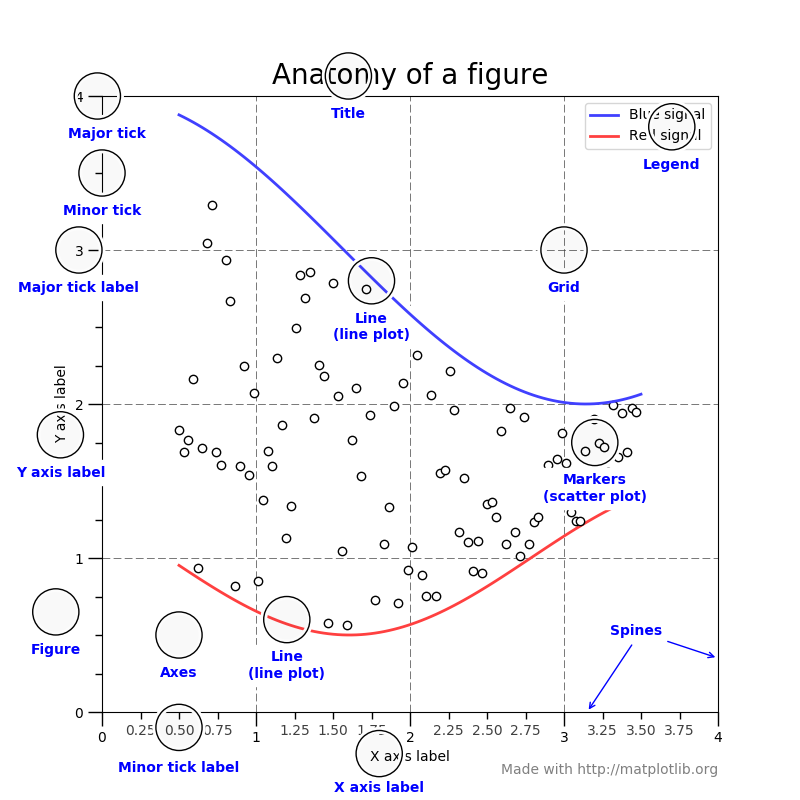

<Figure size 432x288 with 0 Axes>

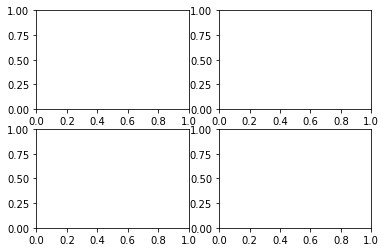

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
fig.suptitle("No axes on this figure")

fig, ax_lst = plt.subplots(2, 2)

dataframe 이나 np.matrix 같은 것들은 array 로 바꿔주는게 좋다.

In [14]:
import pandas
a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values
a_asarray

array([[0.97807527, 0.22998119, 0.38764941, 0.75662406, 0.70902315],
       [0.93818337, 0.6064792 , 0.63667496, 0.92315303, 0.8744514 ],
       [0.63430427, 0.81939702, 0.95689672, 0.00331165, 0.29543503],
       [0.69122154, 0.37465894, 0.3361564 , 0.54582794, 0.68666267]])

In [15]:
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

# Matplotlib, pyplot and pylab: how are they related?

Matplotlib is the whole package and matplotlib.pyplot is a module in Matplotlib.

For functions in the pyplot module, there is always a "current" figure and axes (which is created automatically on request). For example, in the following example, the first call to plt.plot creates the axes, then subsequent calls to plt.plot add additional lines on the same axes, and plt.xlabel, plt.ylabel, plt.title and plt.legend set the axes labels and title and add a legend.

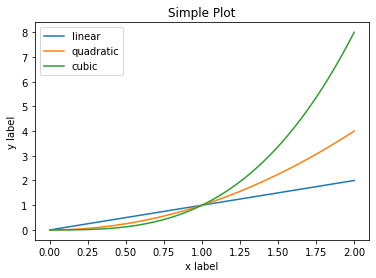

In [16]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label = 'linear')
plt.plot(x, x**2, label = 'quadratic')
plt.plot(x, x**3, label = 'cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title('Simple Plot')
plt.legend()
plt.show()

pylab 대신에 pyplot 을 사용해라

# Coding Styles

When viewing this documentation and examples, you will find different coding styles and usage patterns. These styles are perfectly valid and have their pros and cons. Just about all of the examples can be converted into another style and achieve the same results. The only caveat is to avoid mixing the coding styles for your own code.

> 계속 다른 코딩 스타일 보여줄테니 원하는 거 써라

> Note
Developers for matplotlib have to follow a specific style and guidelines. See The Matplotlib Developers' Guide.

https://matplotlib.org/3.1.1/devel/index.html#developers-guide-index

개발자 가이드라인이 있네

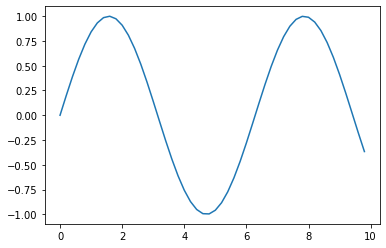

In [17]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

MATLAB 스타일과는 좀 다른가 보다. 이 스타일은 대화형이라 더 명백, 명확하다. 

더 복잡한 애플리케이션의 경우, 이러한 탐생성과 명확성은 더 가치가 높아진다. 그리고 유지보수가 쉬울 것이다.

밑에 함수처럼 만들어서 써라

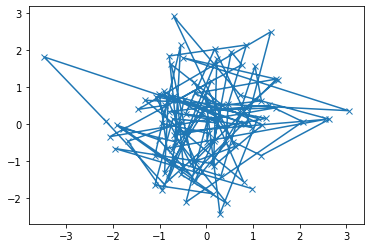

In [19]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker' : 'x'})

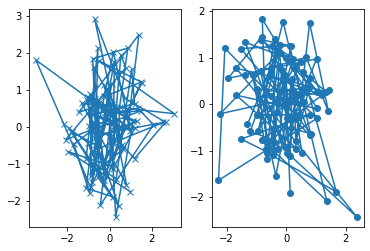

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

# Backends
## What is a backend?

A lot of documentation on the website and in the mailing lists refers to the "backend" and many new users are confused by this term. matplotlib targets many different use cases and output formats. Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands. Some people run Jupyter notebooks and draw inline plots for quick data analysis. Others embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. Some people use matplotlib in batch scripts to generate postscript images from numerical simulations, and still others run web application servers to dynamically serve up graphs.

To support all of these use cases, matplotlib can target different outputs, and each of these capabilities is called a backend; the "frontend" is the user facing code, i.e., the plotting code, whereas the "backend" does all the hard work behind-the-scenes to make the figure. There are two types of backends: user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as "interactive backends") and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").

There are four ways to configure your backend. If they conflict each other, the method mentioned last in the following list will be used, e.g. calling use() will override the setting in your matplotlibrc.

> 사람든은 matplotlib 라이브러리를 다양한 용도로 사용한다. 그 모든 용도를 지원하기위해 matplotlib 은 두 가지 백엔드를 지원한다. <br>
- 사용자 인터페이스 백엔드(pygtk, wxpython, tkinter, qt4 또는 macosx에서 사용)
- 이미지 파일(PNG, SVG, PDF, PS)을 만들기 위한 하드카피 백엔드(PNG, SVG, PDF, PS)

백엔드를 설정하는 4가지 방법

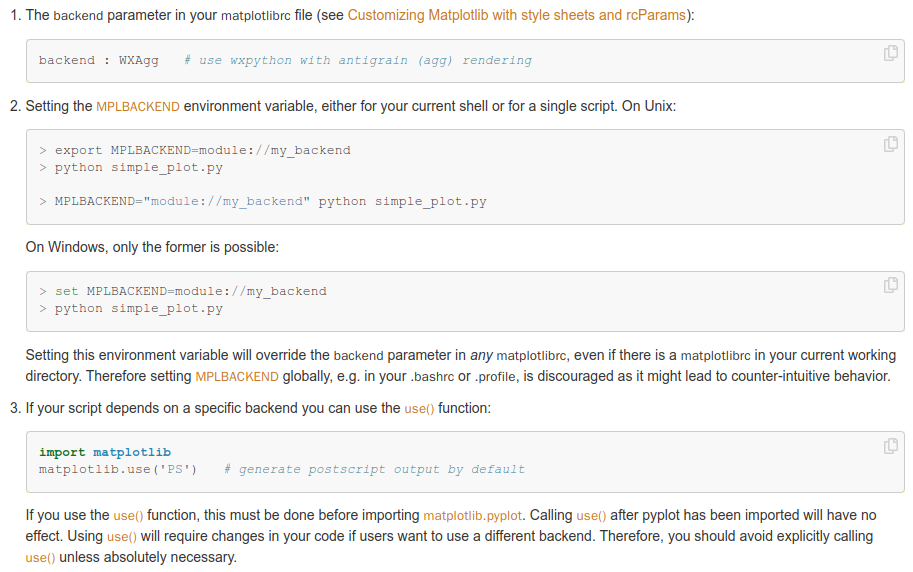

Graphical user interfaces, or a web application server 에서 그리기를 희망하는 사람은 docs 문서를 더 살펴보자.

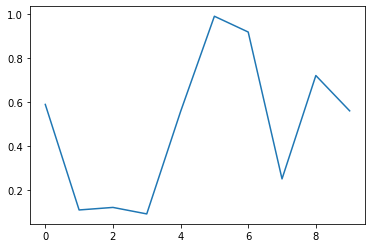

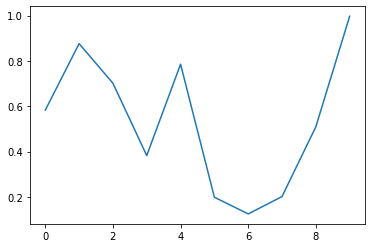

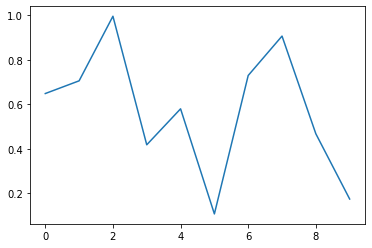

In [23]:
plt.ioff()
for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()

# Performance

Whether exploring data in interactive mode or programmatically saving lots of plots, rendering performance can be a painful bottleneck in your pipeline. Matplotlib provides a couple ways to greatly reduce rendering time at the cost of a slight change (to a settable tolerance) in your plot's appearance. The methods available to reduce rendering time depend on the type of plot that is being created.

> matplotlib은 플롯의 외관상 약간의 변경을 감수하면서 렌더링 시간을 크게 줄일 수 있는 몇 가지 방법을 제공한다.<br> 방법은 작성 중인 플롯의 유형에 따라 다르다.

## Line segment simplification

For plots that have line segments (e.g. typical line plots, outlines of polygons, etc.), rendering performance can be controlled by the path.simplify and path.simplify_threshold parameters in your matplotlibrc file (see Customizing Matplotlib with style sheets and rcParams for more information about the matplotlibrc file). The path.simplify parameter is a boolean indicating whether or not line segments are simplified at all. The path.simplify_threshold parameter controls how much line segments are simplified; higher thresholds result in quicker rendering.

The following script will first display the data without any simplification, and then display the same data with simplification. Try interacting with both of them:

> 선그리는 플롯의 경우 (스타일 시트와 rcParam으로 제어)
- path.simplify : 선의 단순화 여부를 나타낸다, boolean
- path.simplify_threshold : 단순화된 선의 양을 제어하며, 임계값이 높으면 렌더링이 빨라진다. default: $ 1 \over 9 $

밑에 두 가지 경우를 보면서 비교해보자.

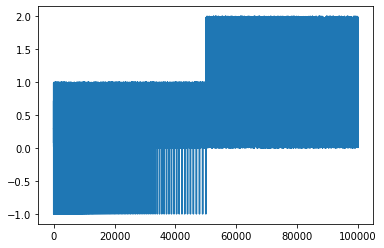

0.9043958187103271


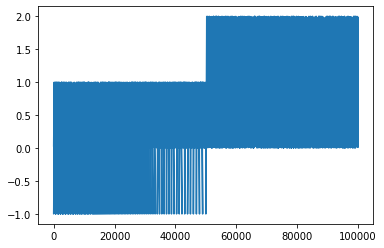

0.09195637702941895


In [24]:
import matplotlib as mpl
from time import time

y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['path.simplify_threshold'] = 0.0
s = time()
plt.plot(y)
plt.show()
print(time() - s)

mpl.rcParams['path.simplify_threshold'] = 1.0
s = time()
plt.plot(y)
plt.show()
print(time() - s)

다른 값을 사용하도록 기본 설정을 변경하려면 matplotlibrc 파일을 변경하십시오.

The simplification works by iteratively merging line segments into a single vector until the next line segment's perpendicular distance to the vector (measured in display-coordinate space) is greater than the path.simplify_threshold parameter.

> 단순화는 다음 선 벡터와의 수직거리가 threshold 보다 클 때까지 라인 세그먼트를 단일 벡터로 반복적으로 병합하여 작동한다. ㅎㅎ 수직거리가 뭘까?

## Marker simplification

Markers can also be simplified, albeit less robustly than line segments. Marker simplification is only available to Line2D objects (through the markevery property). Wherever Line2D construction parameters are passed through, such as matplotlib.pyplot.plot() and matplotlib.axes.Axes.plot(), the markevery parameter can be used:

> 선 보다는 성능이 좋지 않지만 마커또한 단순화가 가능한데 line2D 객체에서만 사용할 수 있다.

```python
plt.plot(x, y, markvery = 10) # 이런식으로 사용가능하고 Markevery Demo에서 자세한 내용 확인 가능.
```

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/markevery_demo.html

# Splitting lines into smaller chunks

If you are using the Agg backend (see What is a backend?), then you can make use of the agg.path.chunksize rc parameter. This allows you to specify a chunk size, and any lines with greater than that many vertices will be split into multiple lines, each of which has no more than agg.path.chunksize many vertices. (Unless agg.path.chunksize is zero, in which case there is no chunking.) For some kind of data, chunking the line up into reasonable sizes can greatly decrease rendering time.

The following script will first display the data without any chunk size restriction, and then display the same data with a chunk size of 10,000. The difference can best be seen when the figures are large, try maximizing the GUI and then interacting with them:

> agg.path.chunksize 를 사용하여 청크 크기를 지정할 수 있다. 선을 적당한 크기로 청크(?)하면 렌더링 시간을 크게 줄일 수 있다. <br>
데이터 크기가 클 때 차이가 잘 나타난다

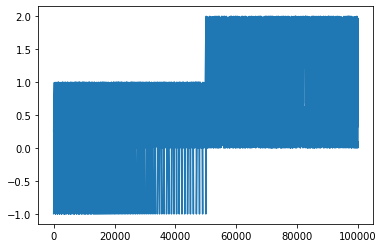

0.09396195411682129


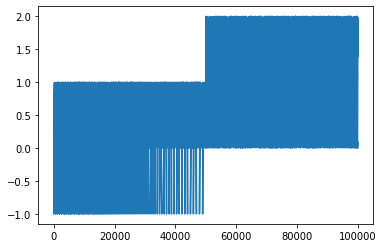

0.09017038345336914


In [27]:
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 0
s = time()
plt.plot(y)
plt.show()
print(time() - s)

mpl.rcParams['agg.path.chunksize'] = 10000
s = time()
plt.plot(y)
plt.show()
print(time() - s)

## Legends

The default legend behavior for axes attempts to find the location that covers the fewest data points (loc='best'). This can be a very expensive computation if there are lots of data points. In this case, you may want to provide a specific location.

> 축에 대한 기본 범례 동작은 가장 적은 데이터 포인트(loc='best')를 포함하는 위치를 찾으려고 시도한다. 데이터 포인트가 많을 경우 이는 매우 비싼 계산일 수 있다. 이 경우 특정 위치를 제공하는 것이 좋을 수 있다. 즉, 범례 위치를 지정하는게 좋다.

## Using the fast style

The fast style can be used to automatically set simplification and chunking parameters to reasonable settings to speed up plotting large amounts of data. It can be used simply by running:

In [28]:
import matplotlib.style as mplstyle
mplstyle.use('fast')

It is very light weight, so it plays nicely with other styles, just make sure the fast style is applied last so that other styles do not overwrite the settings:

In [29]:
mplstyle.use(['dark_background', 'ggplot', 'fast'])

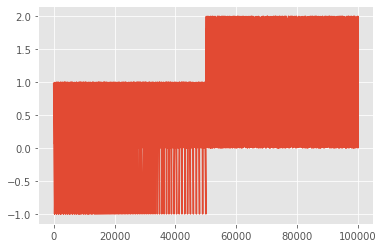

0.09463143348693848


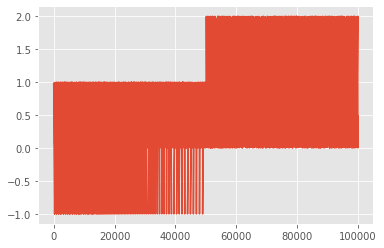

0.09006977081298828


In [31]:
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 0
s = time()
plt.plot(y)
plt.show()
print(time() - s)

mpl.rcParams['agg.path.chunksize'] = 10000
s = time()
plt.plot(y)
plt.show()
print(time() - s)

# Pyplot tutorial

An introduction to the pyplot interface
https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

## Intro to pyplot

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

> pyplot은 matplotlib 을 MATLAB 처럼 작동하게 하는 명령형 함수의 집합이다.

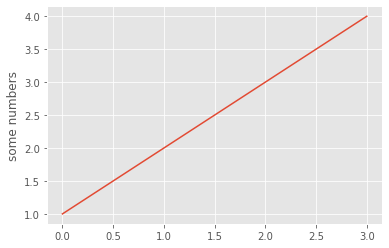

In [32]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

plot 은 단일 배열이 들어올 경우 이를 y 값이라고 인식한다. 즉 y = [1, 2, 3, 4 ] 가 된 것이고 x 값은 주어져있지 않기 때문에  x = [0, 1, 2, 3] 으로 설정된다.

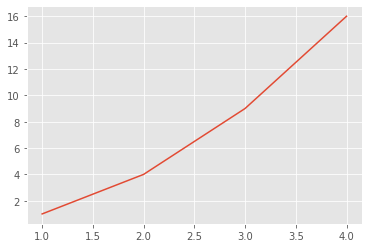

In [33]:
plt.plot([1,2,3,4],[1,4,9,16])

## Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

> 세 번째 인수는 플롯의 색상과 선 유형을 나타내는 형식 문자열이다. MATLAB을 참고했으면 선 스타일과 문자열을 연결하여 작성한다. <br>
예를들어 파란색 실선은 'b-' 이다.

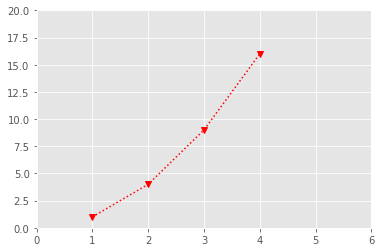

In [62]:
plt.plot([1,2,3,4],[1,4,9,16], 'rv:')
plt.axis([0,6,0,20])
plt.show()

axis = [xmin,xmax,ymin,ymax] 이렇게 리스트 형식으로 줘도 내부적으로 np_array 로 바뀐다.

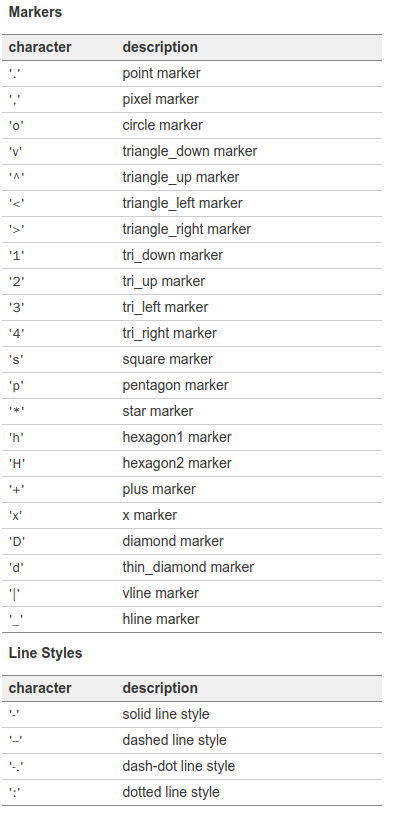

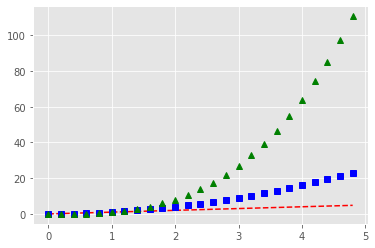

In [63]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') # 한번에 여러개 그리기..
plt.show()

## Plotting with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

> 특정 변수에 문자열을 사용하여 액세스할 수 있는 형식의 데이터가 존재한다. 예를들어 numpy.recarray 또는 dataframe 등이 있다. <br>
matplotlib 에서는 이러한 개체를 데이터 키워드 인수로 제공하여 플랏을 그릴 수 있다.

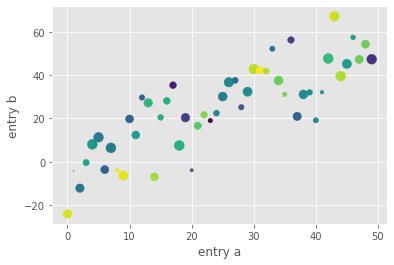

In [65]:
data = {
    'a' : np.arange(50),
    'c' : np.random.randint(0, 50, 50),
    'd' : np.random.rand(50)
}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data = data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## Plotting with categorical variables

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

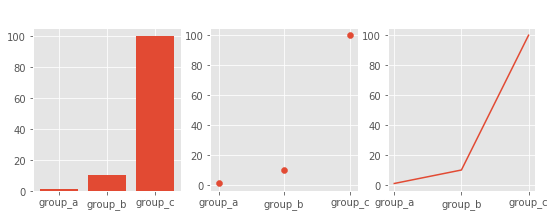

In [66]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values) # bar
plt.subplot(132)
plt.scatter(names, values) # scatter
plt.subplot(133)
plt.plot(names, values) # plot
plt.suptitle('Categorical Plotting')
plt.show()

## Controlling line properties

Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see matplotlib.lines.Line2D. There are several ways to set line properties

> 선에는 설정할 수 있는 많은 특성들이 있다.. 밑 그림 참조

In [68]:
x = [1,2,3,4]
y = [1,4,9,16]

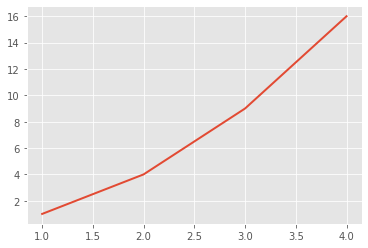

In [69]:
# Use keyword args:
plt.plot(x, y, linewidth = 2.0)

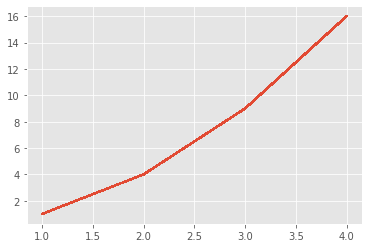

In [75]:
# Use the setter methods of a Line2D instance.
line, = plt.plot(x, y, '-') # var , -> 이렇게 쓰면 tuple 벗겨지나 봄
line.set_antialiased(False) # turn off antialiasing # 삐뚤빼뚤

[None, None, None, None]

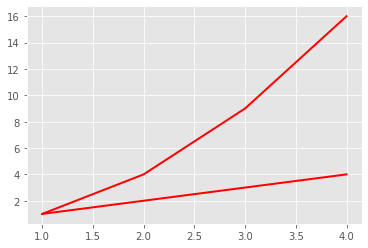

In [76]:
# Use the setp() command. setp()는 리스트 안의 모든 라인들에 작동합니다.
lines = plt.plot(x,x,x,y)
plt.setp(lines, color='r', linewidth = 2.0)
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

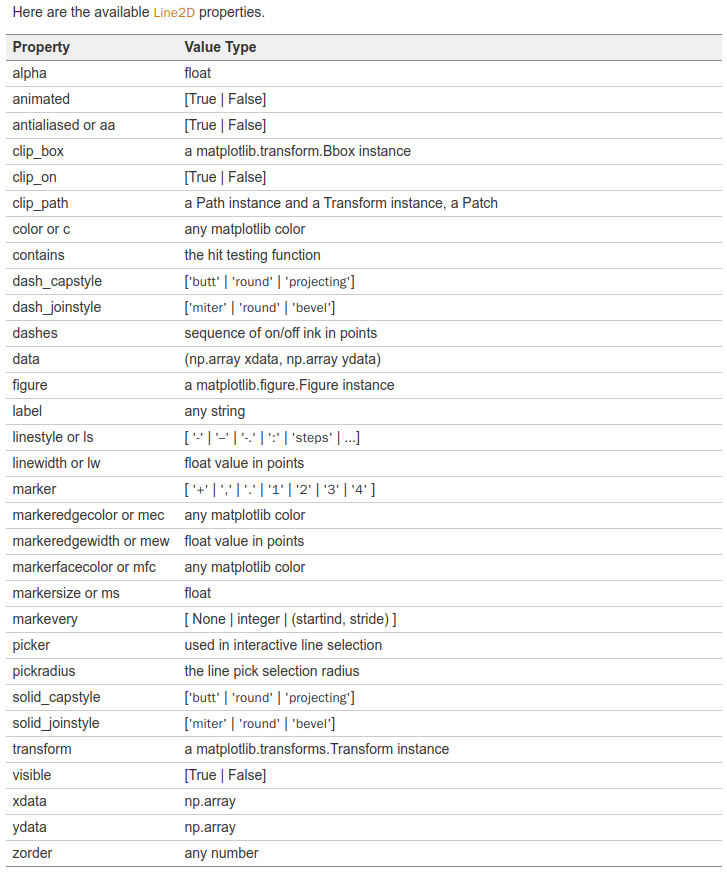

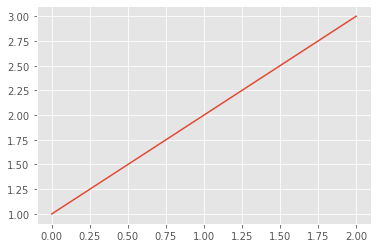

In [77]:
# To get a list of settable line properties, call the setp() function with a line or lines as argument
lines = plt.plot([1, 2, 3])

In [78]:
plt.setp(lines)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  m

## Working with multiple figures and axes

MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

> figure 은 현재 그림과 축의 개념을 가지고 있다. 그리고 모든 pyplot 명령은 현재 축에 적용된다.
- 함수 gca()는 현재 축을 반환한다.
- 함수 gcf()는 현재 그림을 반환한다. <br>
> 보통 이 일은 뒷전에서 처리되기 때문에 걱정할 필요가 없다.

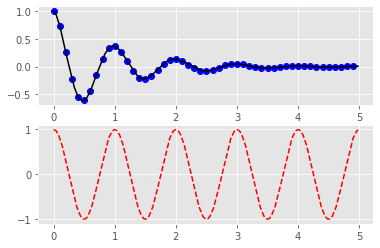

In [80]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
# print(t1, t2 , sep = '\n')

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The figure() command here is optional because figure(1) will be created by default, just as a subplot(111) will be created by default if you don't manually specify any axes. The subplot() command specifies numrows, numcols, plot_number where plot_number ranges from 1 to numrows*numcols. The commas in the subplot command are optional if numrows*numcols<10. So subplot(211) is identical to subplot(2, 1, 1).

You can create an arbitrary number of subplots and axes. If you want to place an axes manually, i.e., not on a rectangular grid, use the axes() command, which allows you to specify the location as axes([left, bottom, width, height]) where all values are in fractional (0 to 1) coordinates. See Axes Demo for an example of placing axes manually and Basic Subplot Demo for an example with lots of subplots.

You can create multiple figures by using multiple figure() calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

> axes 을 수동으로 지정하지 않을 경우 subplot(111)이 기본적으로 생성된다. subplot(numrows,numcols,plot_num) 으로 구성된다.

/home/gunmo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


Text(0.5, 1.0, 'Easy as 1, 2, 3')

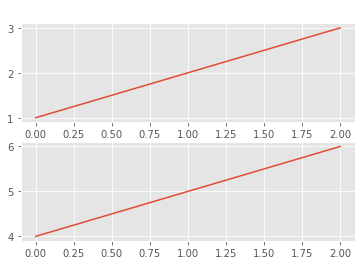

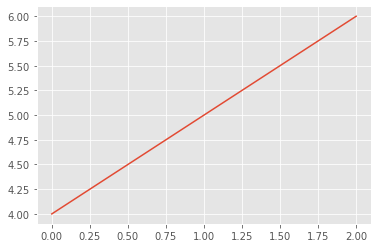

In [81]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

You can clear the current figure with clf() and the current axes with cla(). If you find it annoying that states (specifically the current image, figure and axes) are being maintained for you behind the scenes, don't despair: this is just a thin stateful wrapper around an object oriented API, which you can use instead (see Artist tutorial)

If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close() is called.

> figure 은 clf() 로 axes 는 cla()로 지울 수 있다. 백그라운드에서 유지되고 있는 것이 짜증 날 수도 있지만 이것은 객체 지향 API를 둘러싼 얇은 상태 저장 래퍼일 뿐이며, 대신 사용할 수 있다. <br> 너가 알아야 할 중요한 것은 figure이 clf()로 닫히기 전까지 메모리가 완전히 해제되지 않는다는 것이다.

## Working with text

The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the indicated locations (see Text in Matplotlib Plots for a more detailed example)

> text() 명령은 임의 위치에 텍스트를 추가하는 데 사용된다.

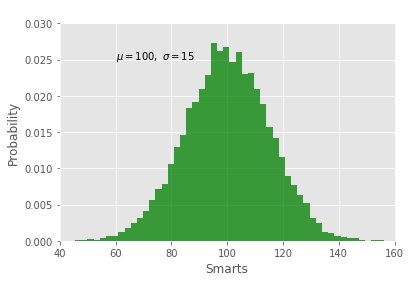

In [84]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density = 1, facecolor = 'g', alpha = 0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$', color = 'black')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the text() commands return an matplotlib.text.Text instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using setp():

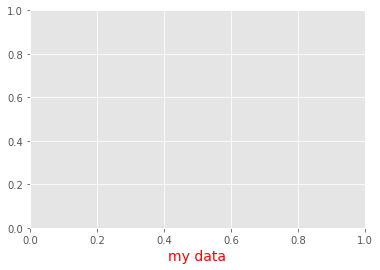

In [85]:
t = plt.xlabel('my data', fontsize=14, color='red')

## Using mathematical expressions in text

matplotlib accepts TeX equation expressions in any text expression. For example to write the expression 𝜎𝑖=15 in the title, you can write a TeX expression surrounded by dollar signs

```python
plt.title(r'$\sigma_i=15$')
```

앞에 r은 중요하다. 즉, 문자열이 원시 문자열이며 python을 탈출 할 때 백슬래시를 처리하지 않는다는 것을 의미한다.

## Annotating text

The uses of the basic text() command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

> 기본 text() 명령은 텍스트를 axes의 임의 위치에 배치한다. annotation()은 주석을 쉽게 만들 수 있는 도우미 기능을 제공한다.

https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/annotation_demo.html
더욱 많은 예제 제공

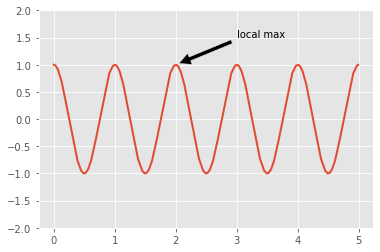

In [89]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5), color = 'black',
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

## Logarithmic and other nonlinear axes

matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:
```python
plt.xscale('log')
```
An example of four plots with the same data and different scales for the y axis is shown below.

> 로그 및 로그 눈금도 지원해준다. 데이터의 크기가 클 때 자주 사용된다.

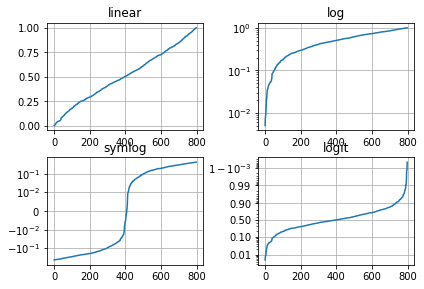

In [5]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)] # 이 조건에 맞지 않는 것은 False 인데 False인 값들은 y[list] 여기서 사라짐.
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

# Image tutorial

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Importing image data into Numpy arrays

Loading image data is supported by the Pillow library. Natively, Matplotlib only supports PNG images. The commands shown below fall back on Pillow if the native read fails.

The image used in this example is a PNG file, but keep that Pillow requirement in mind for your own data.

Here's the image we're going to play with:

> matplotlib 은 png 영상만 지원한다.

In [3]:
img = mpimg.imread('stinkbug.png')
print(img)

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


Note the dtype there - float32. Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0. As a side note, the only datatype that Pillow can work with is uint8. Matplotlib plotting can handle float32 and uint8, but image reading/writing for any format other than PNG is limited to uint8 data. Why 8 bits? Most displays can only render 8 bits per channel worth of color gradation. Why can they only render 8 bits/channel? Because that's about all the human eye can see. More here (from a photography standpoint): Luminous Landscape bit depth tutorial.

> Matplotlib은 각 채널의 8비트 데이러는 0.0 ~ 1.0 사이의 부동 소수점 데이터로 다시 조정한다. Pillow가 작업할 수 있는 유일한 데이터 형식은 uint8이다. <br> Matplotlib 은 float32 와 uint8을 처리할 수 있지만, png가 아닌 다른 형식의 이미지 읽기/쓰기는 uint8 데이터로 제한된다. <br>
대부분의 표시장치는 채널당 8비트만 렌더링할 수 있다. 왜냐하면 그것은 인간의 눈이 인식하는 모든 것이기 때문이다.


## Plotting numpy arrays as images

So, you have your data in a numpy array (either by importing it, or by generating it). Let's render it. In Matplotlib, this is performed using the imshow() function. Here we'll grab the plot object. This object gives you an easy way to manipulate the plot from the prompt.

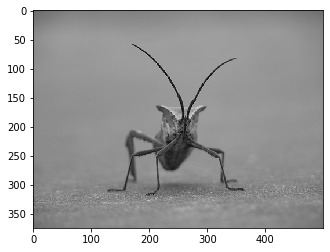

In [4]:
imgplot = plt.imshow(img)

## Applying pseudocolor schemes to image plots

Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. Since R, G, and B are all similar (see for yourself above or in your data), we can just pick one channel of our data:

> Pseudocolor 스키마를 이미지에 적용하는 것은 데이터를 더 쉽게 시각화하는 데 유용한 도구가 될 수 있다. <br>
Pseudocolor는 단일 채널, 그레이스케일, 휘도 이미지와만 관련이 있다.

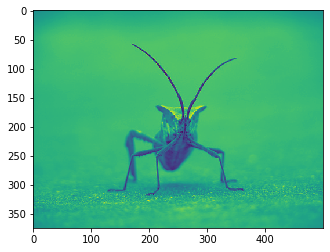

In [5]:
lum_img = img[:, :, 0]
plt.imshow(lum_img)

이제 휘도(2D, 색상 없음) 이미지와 함께 default colormap이 적용된다. default = virides 이고 많은 것들을 선택할 수 있다.

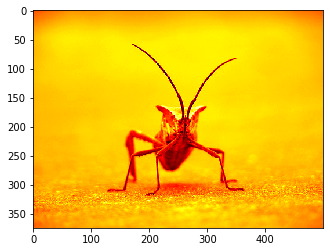

In [6]:
plt.imshow(lum_img, cmap="hot")

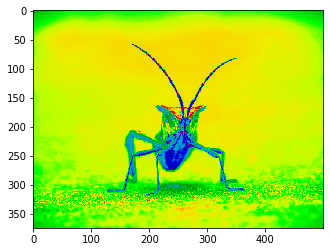

In [7]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

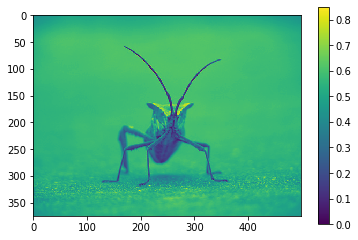

In [8]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

다른 colormap으로 바꾸고 싶으면, 플롯을 다시 만들고 색상 표시줄에 다시 추가해야 한다.

## Examining a specific data range

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don't vary much, or don't matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function.

> 때로는 별로 차이가 없거나 중요하지 않은 색상으로 디테일을 희생시키면서 이미지의 대비를 강화하거나 특정 지역에서 대비를 확장하고 싶을 때가 있다.
흥미로운 영역을 찾는 좋은 도구는 히스토그램이다.

(array([2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 1.000e+01, 1.100e+01, 1.500e+01, 1.400e+01, 2.700e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 3.100e+01, 2.900e+01, 2.800e+01,
        2.400e+01, 2.400e+01, 4.000e+01, 2.600e+01, 5.200e+01, 3.900e+01,
        5.700e+01, 4.600e+01, 8.400e+01, 7.600e+01, 8.900e+01, 8.000e+01,
        1.060e+02, 1.130e+02, 1.120e+02, 9.000e+01, 1.160e+02, 1.090e+02,
        1.270e+02, 1.350e+02, 9.800e+01, 1.310e+02, 1.230e+02, 1.110e+02,
        1.230e+02, 1.160e+02, 1.010e+02, 1.170e+02, 1.000e+02, 1.010e+02,
        9.000e+01, 1.060e+02, 1.260e+02, 1.040e+02, 1.070e+02, 1.110e+02,
        1.380e+02, 1.000e+02, 1.340e+02, 1.210e+02, 1.400e+02, 1.320e+02,
        1.390e+02, 1.160e+02, 1.330e+02, 1.180e+02, 1.080e+02, 1.170e+02,
        1.280e+02, 1.200e+02, 1.210e+02, 1.100e+02, 1.160e+02, 1.180e+02,
        9.700e+01, 9.700e+01, 1.140e+0

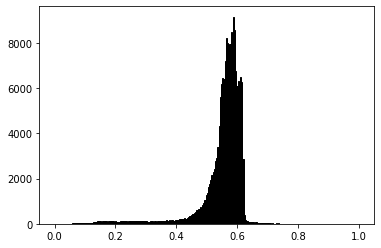

In [9]:
plt.hist(lum_img.ravel(), bins = 256, range = (0.0, 1.0), fc ='k', ec = 'k')

In [10]:
lum_img.ravel(), lum_img.shape # height: 375, width: 500

(array([0.40784314, 0.40784314, 0.40784314, ..., 0.44705883, 0.44705883,
        0.44313726], dtype=float32), (375, 500))

Most often, the "interesting" part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there's not much useful information in the high end (not many white things in the image). Let's adjust the upper limit, so that we effectively "zoom in on" part of the histogram. We do this by passing the clim argument to imshow. You could also do this by calling the set_clim() method of the image plot object, but make sure that you do so in the same cell as your plot command when working with the IPython Notebook - it will not change plots from earlier cells.

You can specify the clim in the call to plot.

> 이미지에서 흥미있는 부분은 피크 주위이니, 상한선을 조절해서 다시 보도록 합시다.

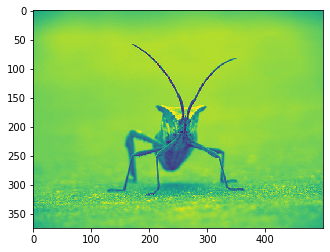

In [11]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

You can also specify the clim using the returned object

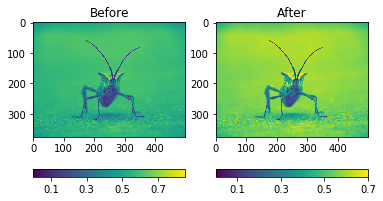

In [12]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
a.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

## Array Interpolation schemes

Interpolation calculates what the color or value of a pixel "should" be, according to different mathematical schemes. One common place that this happens is when you resize an image. The number of pixels change, but you want the same information. Since pixels are discrete, there's missing space. Interpolation is how you fill that space. This is why your images sometimes come out looking pixelated when you blow them up. The effect is more pronounced when the difference between the original image and the expanded image is greater. Let's take our image and shrink it. We're effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren't there anymore, and the computer has to draw in pixels to fill that space.

We'll use the Pillow library that we used to load the image also to resize the image.

> 보간법은 픽셀의 색이나 값이 서로 다른 수학적 구조에 따라 얼마가 되어야 하는지를 계산한다. 보간법은 이미지 크기를 조정할 때 발생하게 됩니다. 예를 들어 픽셀의 수는 바뀌지만 같은 정보를 원할때. <br> 
픽셀이 분리될 때 거기에 채워야 하는 공간이 생기는데 보간법은 그것을 어떻게 채우냐이다. 이미지를 축소할 때, PIL은 효과적으로 폐기하며, 선택된 몇 개만유지한다. <br>
이제 그림을 다시 그릴 때, 사라진 픽셀은 더 이상 존재하지 않으며, 컴퓨터는 그 공간을 채우기 위해 픽셀을 그리게 된다.

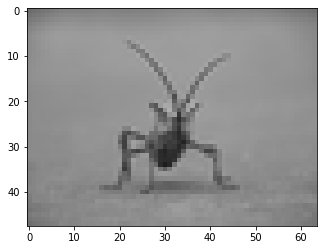

In [13]:
from PIL import Image

img = Image.open('./stinkbug.png')
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)

위의 것은 기본 보간을 사용한 것이다. default = bilinear

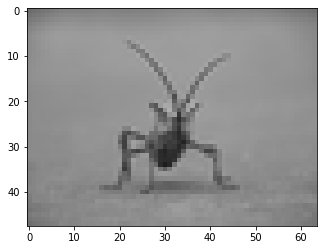

In [14]:
imgplot = plt.imshow(img, interpolation="nearest")

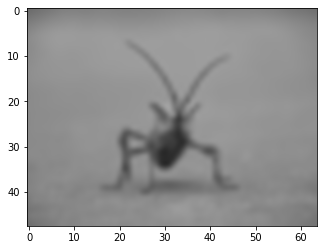

In [15]:
imgplot = plt.imshow(img, interpolation="bicubic")

바이큐빅 보간법은 사진의 크기를 키울 때 종종 사용된다. 아무래도 위의 두 케이스 보다는 흐릿한 것을 사람들이 더 선호한다.

# The Lifecycle of Plot

이 튜토리얼에서는 단일 시각화의 처음, 중간, 끝을 보여준다. 좋은 모범사례도 훑어보고 저장도 해보자.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [17]:
# We'll use the data from the post from which this tutorial was derived. It contains sales information for a number of companies.

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

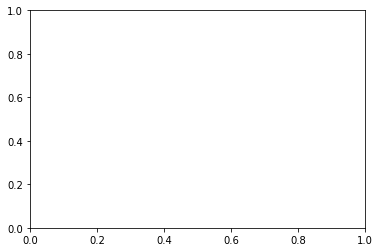

In [18]:
fig, ax = plt.subplots()

<BarContainer object of 10 artists>

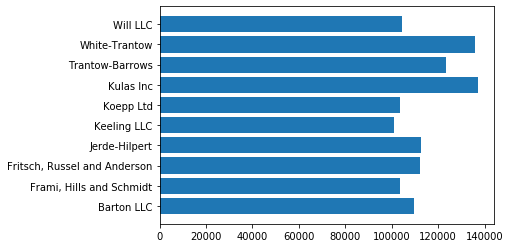

In [20]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

## Controlling the style
There are many styles available in Matplotlib in order to let you tailor your visualization to your needs. To see a list of styles, we can use pyplot.style.

In [21]:
print(plt.style.available)

['seaborn-poster', 'seaborn-colorblind', 'seaborn-white', 'grayscale', 'seaborn-notebook', 'bmh', 'dark_background', 'seaborn-bright', 'seaborn-ticks', 'classic', 'seaborn-talk', 'fivethirtyeight', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn', 'fast', 'tableau-colorblind10', 'seaborn-dark-palette', 'seaborn-paper', 'seaborn-muted', 'seaborn-darkgrid', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-dark', 'ggplot', '_classic_test']


In [ ]:
plt.style.use('fivethirtyeight')